In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 18_02_2022 07_33_42.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')

In [5]:
filtrado = dados[['Competencia Internacao','Houve internacao','Classificacao final','Evolucao','Faixa Etaria','Idade']]
filtrado = filtrado.dropna()
filtrado

,Competencia Internacao,Houve internacao,Classificacao final,Evolucao,Faixa Etaria,Idade
1,2021_10,Sim,COVID-19,Cura,80 e mais anos,80.0
2,2021_08,Sim,COVID-19,Cura,50-59 anos,54.0
4,2021_06,Sim,COVID-19,Cura,50-59 anos,55.0
6,2021_02,Sim,COVID-19,Óbito,80 e mais anos,82.0
9,2021_05,Sim,COVID-19,Segue Internado,60-69 anos,61.0
...,...,...,...,...,...,...
164940,2020_08,Sim,COVID-19,Cura,70-79 anos,74.0
164941,2020_11,Sim,COVID-19,Cura,60-69 anos,62.0
164942,2021_02,Sim,COVID-19,Óbito,80 e mais anos,85.0
164943,2021_09,Sim,COVID-19,Cura,40-49 anos,46.0


In [6]:
filtrado['Idade'] = filtrado['Idade'].astype(int)
filtrado.head(20)

,Competencia Internacao,Houve internacao,Classificacao final,Evolucao,Faixa Etaria,Idade
1,2021_10,Sim,COVID-19,Cura,80 e mais anos,80
2,2021_08,Sim,COVID-19,Cura,50-59 anos,54
4,2021_06,Sim,COVID-19,Cura,50-59 anos,55
6,2021_02,Sim,COVID-19,Óbito,80 e mais anos,82
9,2021_05,Sim,COVID-19,Segue Internado,60-69 anos,61
10,2021_05,Sim,COVID-19,Cura,40-49 anos,41
11,2021_08,Sim,SRAG não especificado,Óbito,80 e mais anos,86
12,2020_10,Sim,COVID-19,Óbito,60-69 anos,66
13,2020_12,Sim,COVID-19,Segue Internado,30-39 anos,38
14,2021_04,Sim,COVID-19,Cura,40-49 anos,43


In [7]:
for index, idade in filtrado.iterrows():
    if idade['Idade'] < 12:
        filtrado.loc[index,'Idade'] = '0-11 anos'
    elif idade['Idade'] < 20:
        filtrado.loc[index,'Idade'] = '12-19 anos'
    elif idade['Idade'] < 40:
        filtrado.loc[index,'Idade'] = '20-39 anos'
    elif idade['Idade'] < 60:
        filtrado.loc[index,'Idade'] = '40-59 anos'
    elif idade['Idade'] < 80:
        filtrado.loc[index,'Idade'] = '60-79 anos'
    elif idade['Idade'] < 150:
        filtrado.loc[index,'Idade'] = '80 e mais'

In [8]:
filtrado = filtrado.loc[filtrado['Houve internacao']=='Sim']
filtrado = filtrado.loc[filtrado['Classificacao final']=='COVID-19']
filtrado = filtrado.loc[filtrado['Evolucao']=='Óbito']
filtrado.head()

,Competencia Internacao,Houve internacao,Classificacao final,Evolucao,Faixa Etaria,Idade
6,2021_02,Sim,COVID-19,Óbito,80 e mais anos,80 e mais
12,2020_10,Sim,COVID-19,Óbito,60-69 anos,60-79 anos
18,2021_06,Sim,COVID-19,Óbito,50-59 anos,40-59 anos
22,2020_10,Sim,COVID-19,Óbito,70-79 anos,60-79 anos
23,2021_02,Sim,COVID-19,Óbito,80 e mais anos,80 e mais


In [9]:
totalHospitalizacoes = filtrado.groupby('Competencia Internacao').count()
totalHospitalizacoes.head()

,Houve internacao,Classificacao final,Evolucao,Faixa Etaria,Idade
Competencia Internacao,,,,,
2020_03,28,28,28,28,28
2020_04,101,101,101,101,101
2020_05,231,231,231,231,231
2020_06,708,708,708,708,708
2020_07,1692,1692,1692,1692,1692


In [10]:
separaIdade = filtrado.groupby(['Idade','Competencia Internacao']).count()
separaIdade.head()

Houve internacao  Classificacao final  \
Idade     Competencia Internacao                                          
0-11 anos 2020_04                                1                    1   
          2020_07                                2                    2   
          2020_08                                2                    2   
          2020_10                                3                    3   
          2021_01                                2                    2   

                                  Evolucao  Faixa Etaria  
Idade     Competencia Internacao                          
0-11 anos 2020_04                        1             1  
          2020_07                        2             2  
          2020_08                        2             2  
          2020_10                        3             3  
          2021_01                        2             2

In [11]:
idade11 = separaIdade.reset_index()
idade11 = idade11.loc[idade11['Idade']=='0-11 anos']
idade11 = idade11.set_index('Competencia Internacao')
idade11['Proporcao'] = idade11['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade11 = idade11.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade11 = idade11.drop(columns=['Houve internacao_y','Classificacao final_y','Evolucao_y','Faixa Etaria_y','Idade_y'])
idade11['Proporcao'] = idade11['Proporcao'].fillna(0)
idade11 = idade11.drop('2020_03')
idade11 = idade11['Proporcao']
idade11

Competencia Internacao
2020_04    0.990099
2020_05    0.000000
2020_06    0.000000
2020_07    0.118203
2020_08    0.135410
2020_09    0.000000
2020_10    0.325733
2020_11    0.000000
2020_12    0.000000
2021_01    0.125628
2021_02    0.116178
2021_03    0.048141
2021_04    0.030553
2021_05    0.034746
2021_06    0.083438
2021_07    0.289575
2021_08    0.000000
2021_09    0.341297
2021_10    0.000000
2021_11    0.234192
2021_12    0.000000
2022_01    0.554324
2022_02    0.584795
Name: Proporcao, dtype: float64

In [12]:
idade19 = separaIdade.reset_index()
idade19 = idade19.loc[idade19['Idade']=='12-19 anos']
idade19 = idade19.set_index('Competencia Internacao')
idade19['Proporcao'] = idade19['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade19 = idade19.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade19 = idade19.drop(columns=['Houve internacao_y','Classificacao final_y','Evolucao_y','Faixa Etaria_y','Idade_y'])
idade19['Proporcao'] = idade19['Proporcao'].fillna(0)
idade19 = idade19.drop('2020_03')
idade19 = idade19['Proporcao']
idade19

Competencia Internacao
2020_04    0.000000
2020_05    0.000000
2020_06    0.282486
2020_07    0.118203
2020_08    0.270819
2020_09    0.090909
2020_10    0.217155
2020_11    0.000000
2020_12    0.095147
2021_01    0.062814
2021_02    0.087133
2021_03    0.204597
2021_04    0.061106
2021_05    0.138985
2021_06    0.166875
2021_07    0.000000
2021_08    0.159744
2021_09    0.682594
2021_10    0.000000
2021_11    0.234192
2021_12    0.000000
2022_01    0.221729
2022_02    0.000000
Name: Proporcao, dtype: float64

In [13]:
idade39 = separaIdade.reset_index()
idade39 = idade39.loc[idade39['Idade']=='20-39 anos']
idade39 = idade39.set_index('Competencia Internacao')
idade39['Proporcao'] = idade39['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade39 = idade39.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade39 = idade39.drop(columns=['Houve internacao_y','Classificacao final_y','Evolucao_y','Faixa Etaria_y','Idade_y'])
idade39['Proporcao'] = idade39['Proporcao'].fillna(0)
idade39 = idade39.drop('2020_03')
idade39 = idade39['Proporcao']
idade39

Competencia Internacao
2020_04    3.960396
2020_05    5.194805
2020_06    3.954802
2020_07    3.250591
2020_08    2.640487
2020_09    3.000000
2020_10    2.280130
2020_11    3.573883
2020_12    1.998097
2021_01    2.261307
2021_02    4.327621
2021_03    5.415814
2021_04    5.682860
2021_05    7.991661
2021_06    9.470171
2021_07    6.370656
2021_08    4.472843
2021_09    3.412969
2021_10    2.469136
2021_11    4.449649
2021_12    5.882353
2022_01    1.884701
2022_02    1.169591
Name: Proporcao, dtype: float64

In [14]:
idade59 = separaIdade.reset_index()
idade59 = idade59.loc[idade59['Idade']=='40-59 anos']
idade59 = idade59.set_index('Competencia Internacao')
idade59['Proporcao'] = idade59['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade59 = idade59.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade59 = idade59.drop(columns=['Houve internacao_y','Classificacao final_y','Evolucao_y','Faixa Etaria_y','Idade_y'])
idade59['Proporcao'] = idade59['Proporcao'].fillna(0)
idade59 = idade59.drop('2020_03')
idade59 = idade59['Proporcao']
idade59

Competencia Internacao
2020_04    12.871287
2020_05    17.316017
2020_06    20.197740
2020_07    16.312057
2020_08    16.519973
2020_09    14.636364
2020_10    14.115092
2020_11    14.845361
2020_12    14.509990
2021_01    16.771357
2021_02    22.538484
2021_03    25.911662
2021_04    29.178124
2021_05    38.255733
2021_06    38.256154
2021_07    26.254826
2021_08    15.974441
2021_09    13.139932
2021_10    12.037037
2021_11    15.925059
2021_12    17.647059
2022_01    13.414634
2022_02    11.111111
Name: Proporcao, dtype: float64

In [15]:
idade79 = separaIdade.reset_index()
idade79 = idade79.loc[idade79['Idade']=='60-79 anos']
idade79 = idade79.set_index('Competencia Internacao')
idade79['Proporcao'] = idade79['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade79 = idade79.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade79 = idade79.drop(columns=['Houve internacao_y','Classificacao final_y','Evolucao_y','Faixa Etaria_y','Idade_y'])
idade79['Proporcao'] = idade79['Proporcao'].fillna(0)
idade79 = idade79.drop('2020_03')
idade79 = idade79['Proporcao']
idade79

Competencia Internacao
2020_04    50.495050
2020_05    46.753247
2020_06    51.412429
2020_07    51.891253
2020_08    51.523358
2020_09    53.363636
2020_10    53.203040
2020_11    53.539519
2020_12    53.758325
2021_01    50.314070
2021_02    50.421144
2021_03    52.461187
2021_04    53.101130
2021_05    37.804031
2021_06    34.584898
2021_07    41.698842
2021_08    49.520767
2021_09    52.389078
2021_10    61.265432
2021_11    54.098361
2021_12    50.980392
2022_01    44.567627
2022_02    40.350877
Name: Proporcao, dtype: float64

In [16]:
idade80 = separaIdade.reset_index()
idade80 = idade80.loc[idade80['Idade']=='80 e mais']
idade80 = idade80.set_index('Competencia Internacao')
idade80['Proporcao'] = idade80['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade80 = idade80.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade80 = idade80.drop(columns=['Houve internacao_y','Classificacao final_y','Evolucao_y','Faixa Etaria_y','Idade_y'])
idade80['Proporcao'] = idade80['Proporcao'].fillna(0)
idade80 = idade80.drop('2020_03')
idade80 = idade80['Proporcao']
idade80

Competencia Internacao
2020_04    31.683168
2020_05    30.735931
2020_06    24.152542
2020_07    28.309693
2020_08    28.909953
2020_09    28.909091
2020_10    29.858849
2020_11    28.041237
2020_12    29.638440
2021_01    30.464824
2021_02    22.509439
2021_03    15.958599
2021_04    11.946227
2021_05    15.774844
2021_06    17.438465
2021_07    25.386100
2021_08    29.872204
2021_09    30.034130
2021_10    24.228395
2021_11    25.058548
2021_12    25.490196
2022_01    39.356984
2022_02    46.783626
Name: Proporcao, dtype: float64

In [17]:
competencia = idade80.to_frame()
competencia = competencia.reset_index()
competencia = competencia['Competencia Internacao']
competencia

0     2020_04
1     2020_05
2     2020_06
3     2020_07
4     2020_08
5     2020_09
6     2020_10
7     2020_11
8     2020_12
9     2021_01
10    2021_02
11    2021_03
12    2021_04
13    2021_05
14    2021_06
15    2021_07
16    2021_08
17    2021_09
18    2021_10
19    2021_11
20    2021_12
21    2022_01
22    2022_02
Name: Competencia Internacao, dtype: object

In [18]:
legenda = pd.DataFrame(columns=['0-11','12-19','20-39','40-59','60-79','80 e mais'])

In [19]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 18_2_2022'

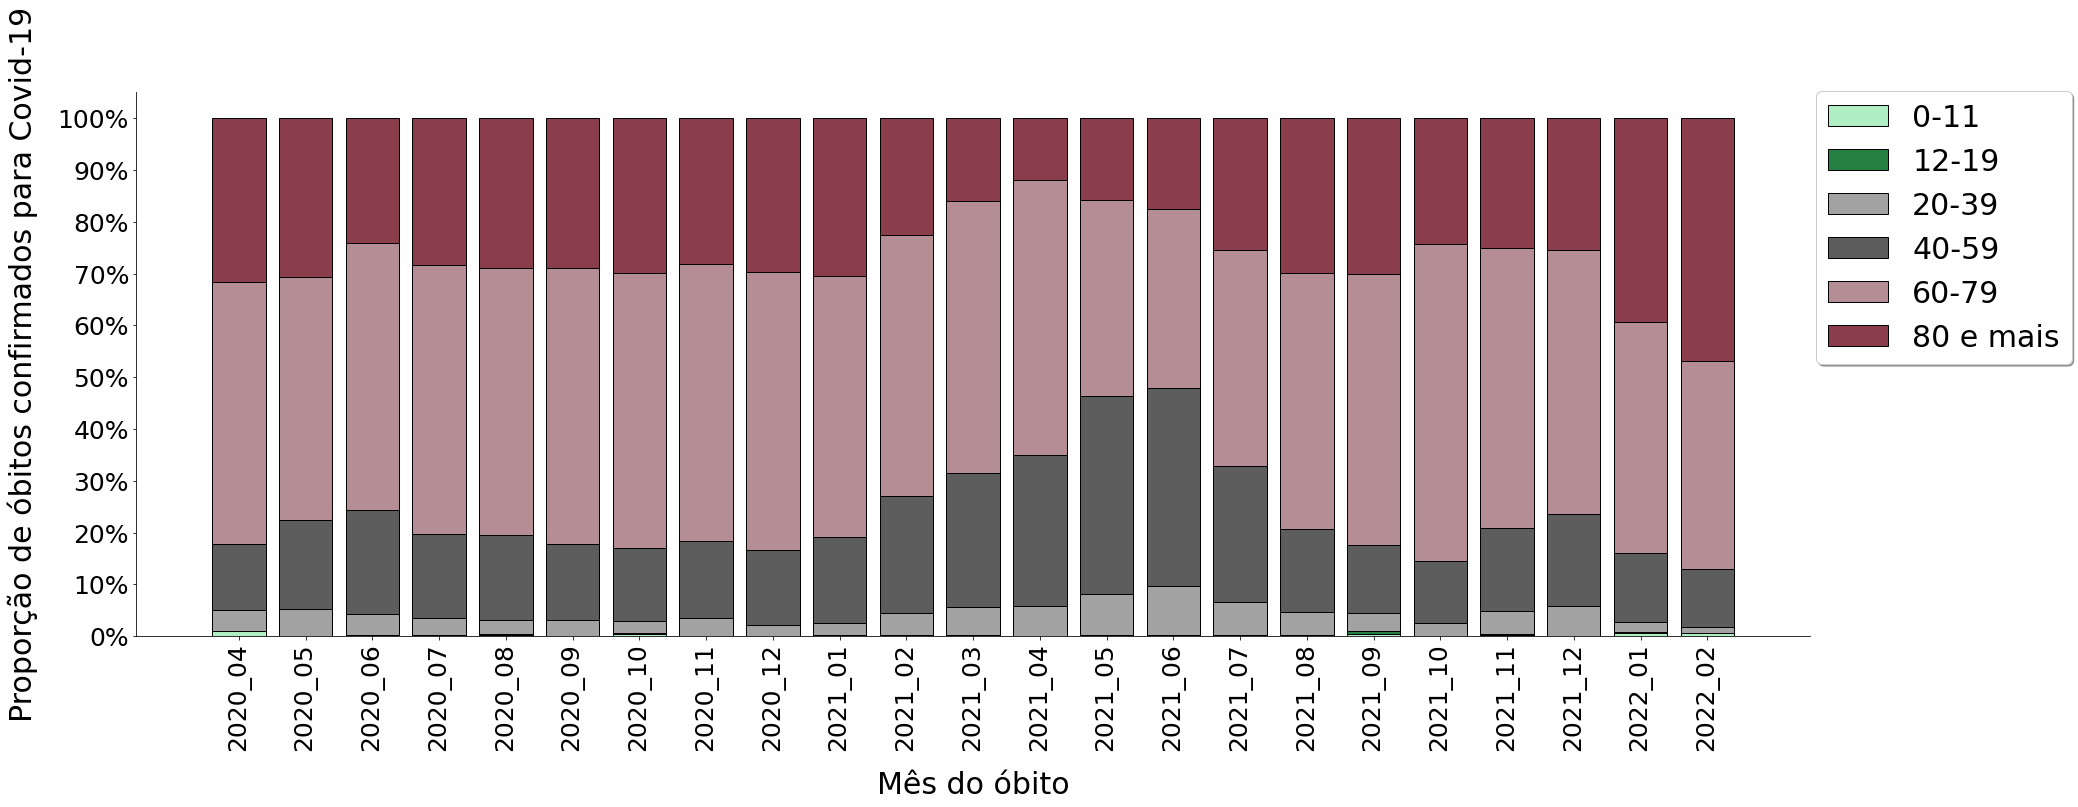

In [20]:
plt.figure(figsize=(30,10))
plt.bar(competencia,idade11, color='#afedc2',edgecolor='#000000')
plt.bar(competencia,idade19, bottom=idade11, color="#268042",edgecolor='#000000')
plt.bar(competencia,idade39, bottom=idade11 + idade19, color='#a3a2a2',edgecolor='#000000')
plt.bar(competencia,idade59, bottom=idade11 + idade19 + idade39, color='#5e5d5d',edgecolor='#000000')
plt.bar(competencia,idade79, bottom=idade11 + idade19 + idade39 + idade59, color='#b58d94',edgecolor='#000000')
plt.bar(competencia,idade80, bottom=idade11 + idade19 + idade39 + idade59 + idade79, color='#8a3e4b',edgecolor='#000000')
sns.despine()
plt.xticks(rotation=90,fontsize=25)
plt.xlabel('Mês do óbito',fontsize=30,labelpad=20)
plt.yticks(np.arange(0,110,10),fontsize=25)
plt.ylabel('Proporção de óbitos confirmados para Covid-19',fontsize=30,labelpad=20)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.legend(legenda,loc='upper center',fancybox=True,bbox_to_anchor=(1.08,1.03),fontsize=30,shadow=True)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide11.png',dpi=720,bbox_inches='tight')